## 链家网上海租房数据分析

## 一、数据读取

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_excel("链家网上海租房信息汇总.xlsx")
data.head()

,ceng,chaoxiang,date,kanguo,mianji,price,region,shiting,street,title,xiaoqu
0,中区/8层,朝南,2017.08.20\n\t\t\t\t\t\t\t上架,17,66平,4600,浦东,2室1厅,唐镇,好房好心情，钥匙在链家，受欢迎好房，精致户型,毕加索小镇（一期）（公寓）
1,高区/7层,朝南北,2017.08.19\n\t\t\t\t\t\t\t上架,26,50平,3700,闵行,1室1厅,静安新城,静安新城，南北通，光线非常好，人气房源,静安新城（三区）
2,中区/11层,朝南北,2017.08.14\n\t\t\t\t\t\t\t上架,27,89平,7500,浦东,3室2厅,三林,万科金色雅筑，链家好房，3房出租，有钥匙房源,万科金色雅筑
3,中区/4层,朝南,2017.08.13\n\t\t\t\t\t\t\t上架,11,32平,7000,静安,1室0厅,南京西路,升平小区，低楼层，实地看房，上门实拍,升平小区
4,中区/6层,无朝向数据,2017.08.09\n\t\t\t\t\t\t\t上架,24,57平,3800,杨浦,2室1厅,中原,市光三村，交通方便，放心好房，有钥匙方便看,市光三村


## 二、数据概况

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31129 entries, 0 to 31128
Data columns (total 11 columns):
ceng         31129 non-null object
chaoxiang    31129 non-null object
date         31129 non-null object
kanguo       31129 non-null int64
mianji       31129 non-null object
price        31129 non-null int64
region       31129 non-null object
shiting      31129 non-null object
street       31129 non-null object
title        31129 non-null object
xiaoqu       31129 non-null object
dtypes: int64(2), object(9)
memory usage: 2.8+ MB


In [3]:
data.describe()

,kanguo,price
count,31129.000000,31129.000000
mean,2.878281,8693.488130
std,5.091049,10677.906353
min,0.000000,960.000000
25%,0.000000,3900.000000
50%,1.000000,5500.000000
75%,3.000000,9500.000000
max,77.000000,580000.000000


In [4]:
data.apply(lambda x:sum(x.isnull()))
#http://blog.csdn.net/u010099080/article/details/53019844
#apply主要用于数据聚合运算

ceng         0
chaoxiang    0
date         0
kanguo       0
mianji       0
price        0
region       0
shiting      0
street       0
title        0
xiaoqu       0
dtype: int64

In [5]:
data10wan=data[data['price']>100000]#价格大于10万的数据

In [6]:
len(data10wan)

25

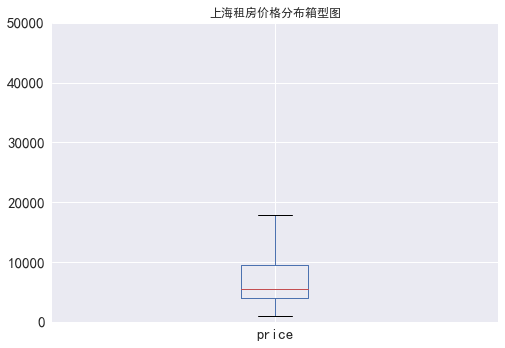

In [7]:
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']
data["price"].plot(kind="box",fontsize=15)
plt.ylim(0,50000)
plt.title("上海租房价格分布箱型图")
plt.show()

## 三、数据清洗和探索分析

In [8]:
data.head()

,ceng,chaoxiang,date,kanguo,mianji,price,region,shiting,street,title,xiaoqu
0,中区/8层,朝南,2017.08.20\n\t\t\t\t\t\t\t上架,17,66平,4600,浦东,2室1厅,唐镇,好房好心情，钥匙在链家，受欢迎好房，精致户型,毕加索小镇（一期）（公寓）
1,高区/7层,朝南北,2017.08.19\n\t\t\t\t\t\t\t上架,26,50平,3700,闵行,1室1厅,静安新城,静安新城，南北通，光线非常好，人气房源,静安新城（三区）
2,中区/11层,朝南北,2017.08.14\n\t\t\t\t\t\t\t上架,27,89平,7500,浦东,3室2厅,三林,万科金色雅筑，链家好房，3房出租，有钥匙房源,万科金色雅筑
3,中区/4层,朝南,2017.08.13\n\t\t\t\t\t\t\t上架,11,32平,7000,静安,1室0厅,南京西路,升平小区，低楼层，实地看房，上门实拍,升平小区
4,中区/6层,无朝向数据,2017.08.09\n\t\t\t\t\t\t\t上架,24,57平,3800,杨浦,2室1厅,中原,市光三村，交通方便，放心好房，有钥匙方便看,市光三村


In [9]:
import re
a=r"(.*?)区"
b=r"\d+"
def get_water_supply_region(x):
    if(len(re.findall(a,x))==0):
        return "无"
    else:
        return re.findall(a,x)[0]
#x.strip()移除字符串头尾指定的字符(默认为空格)
#语法 strip()方法语法: str.strip([chars]);参数 chars --移除字符串头尾指定的
data['ceng']=data['ceng'].apply(lambda x:x.strip())
data['water_supply_region']=data['ceng'].apply(get_water_supply_region)
data['floor']=data['ceng'].apply(lambda x:re.findall(b,x)[0])
data['floor']=data['floor'].astype(np.int64)
data.drop("ceng",axis=1,inplace=True)

In [10]:
water=data["water_supply_region"].value_counts()

In [11]:
type(water)

pandas.core.series.Series

In [12]:
water=pd.DataFrame(water)

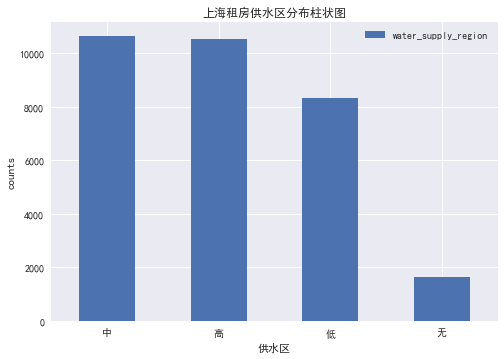

In [13]:
water.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("供水区")
plt.ylabel("counts")
plt.title("上海租房供水区分布柱状图")
plt.show()

## 楼层切段：0为1-5层，1为6-10层，2为11-20层，3为21-30层，4为30层以上

In [14]:
data["floor"]=data["floor"].apply(lambda x: 0 if(1<=x<=5) else x)
data['floor']=data['floor'].apply(lambda x: 1 if(6<=x<=10) else x)
data['floor']=data['floor'].apply(lambda x: 2 if(11<=x<=20) else x)
data['floor']=data['floor'].apply(lambda x: 3 if(21<=x<=30) else x)
data['floor']=data['floor'].apply(lambda x: 4 if(x>30) else x)

In [15]:
aa=data['floor'].value_counts()

In [16]:
cc=pd.DataFrame(aa)

In [17]:
cc

,floor
1,12889
2,8359
0,4155
3,3760
4,1966


In [18]:
cc.columns=['counts']
cc['floor']=cc.index

In [19]:
cc

,counts,floor
1,12889,1
2,8359,2
0,4155,0
3,3760,3
4,1966,4


In [20]:
cc.sort_index()

,counts,floor
0,4155,0
1,12889,1
2,8359,2
3,3760,3
4,1966,4


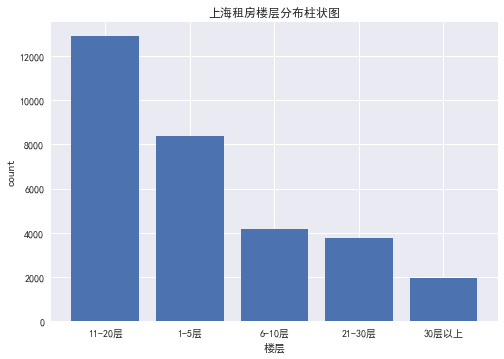

In [21]:
plt.bar(cc['floor'],cc['counts'])
plt.xticks(cc['floor'],["1-5层", "6-10层", "11-20层", "21-30层", "30层以上"],rotation=0)
plt.xlabel("楼层")
plt.ylabel("count")
plt.title("上海租房楼层分布柱状图")
plt.show()

## 2处理朝向

In [22]:
chaoxiang=data['chaoxiang'].value_counts()
chaoxiang

无朝向数据    14961
朝南        8506
朝南北       6118
朝北         406
朝西南        307
朝东南        286
朝西         182
朝东         172
朝西北         67
朝东西         64
朝东北         60
Name: chaoxiang, dtype: int64

In [23]:
chao=pd.DataFrame(chaoxiang)

In [24]:
chao.columns=['counts']
chao

,counts
无朝向数据,14961
朝南,8506
朝南北,6118
朝北,406
朝西南,307
朝东南,286
朝西,182
朝东,172
朝西北,67
朝东西,64


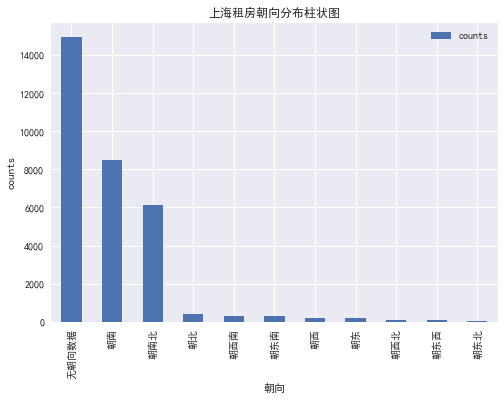

In [25]:
chao.plot(kind="bar")
plt.xlabel("朝向")
plt.ylabel("counts")
plt.title("上海租房朝向分布柱状图")
plt.show()

In [26]:
data['chaoxiang']=data['chaoxiang'].apply(lambda x:x.strip())
qita = ["朝北", "朝东", "朝东北", "朝东南", "朝东西", "朝西", "朝西北", "朝西南"]
for each in qita:
    data['chaoxiang']=data['chaoxiang'].apply(lambda x:"其他" if x==each else x)
    

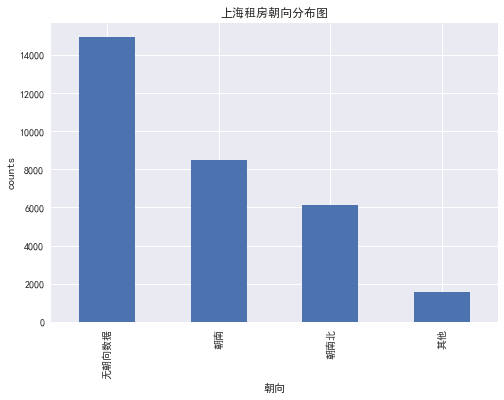

In [27]:
data['chaoxiang'].value_counts().plot(kind="bar")
plt.xlabel("朝向")
plt.ylabel("counts")
plt.title("上海租房朝向分布图")
plt.show()

### 3、处理title

### 没用的直接去掉就好

In [28]:
data.drop("title",axis=1,inplace=True)

In [29]:
data.head(1)

,chaoxiang,date,kanguo,mianji,price,region,shiting,street,xiaoqu,water_supply_region,floor
0,朝南,2017.08.20\n\t\t\t\t\t\t\t上架,17,66平,4600,浦东,2室1厅,唐镇,毕加索小镇（一期）（公寓）,中,1


### 4、处理日期

In [30]:
date=data["date"].value_counts()
date.head()

2017.09.06\n\t\t\t\t\t\t\t上架    708
2017.09.03\n\t\t\t\t\t\t\t上架    683
2017.09.10\n\t\t\t\t\t\t\t上架    681
2017.09.02\n\t\t\t\t\t\t\t上架    659
2017.09.09\n\t\t\t\t\t\t\t上架    656
Name: date, dtype: int64

In [31]:
data['date']=data['date'].apply(lambda x:x[:10])

In [32]:
type(data['date'][0])

str

In [33]:
data['date']=pd.to_datetime(data['date'])

In [34]:
type(data['date'][0])

pandas.tslib.Timestamp

In [35]:
date=data['date'].value_counts()

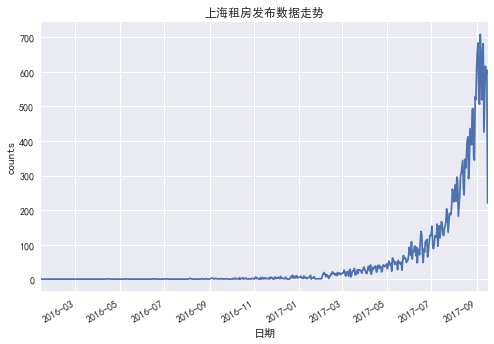

In [36]:
date.plot()
plt.xlabel("日期")
plt.ylabel("counts")
plt.title("上海租房发布数据走势")
plt.show()

### 5、处理带看次数

### 切段：0为0次，1为1次，2为2-5次，3为6-10次，4为10次以上


In [37]:
data["kanguo"]=data["kanguo"].apply(lambda x: 2 if (2<=x<=5) else x)
data['kanguo']=data['kanguo'].apply(lambda x:3 if(6<=x<=10) else x)
data["kanguo"]=data["kanguo"].apply(lambda x:4 if(x>10) else x)
kan=data['kanguo'].value_counts()

In [38]:
kan=pd.DataFrame(kan)

In [39]:
kan

,kanguo
0,12859
2,8107
1,5146
3,2916
4,2101


In [40]:
kan=kan.sort_index()

In [41]:
kan

,kanguo
0,12859
1,5146
2,8107
3,2916
4,2101


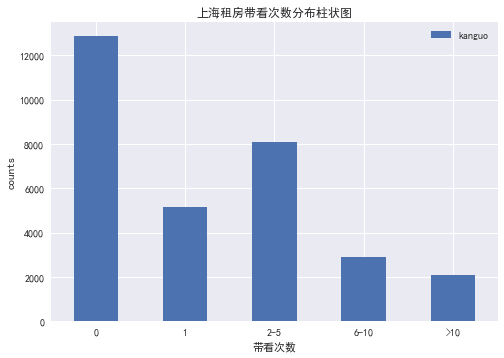

In [42]:
kan.plot(kind='bar')
plt.xlabel("带看次数")
plt.ylabel("counts")
plt.title("上海租房带看次数分布柱状图")
plt.xticks([0,1,2,3,4],["0","1","2-5","6-10",">10"],rotation=0)
plt.show()

### 6、处理面积

In [43]:
a=r'(.*?)平'
data['mianji']=data['mianji'].apply(lambda x:re.findall(a,x)[0])
data['mianji']=data['mianji'].astype(np.int64)

In [44]:
data['mianji'].describe()

count    31129.000000
mean       102.962061
std         76.504647
min          1.000000
25%         61.000000
50%         89.000000
75%        123.000000
max       5500.000000
Name: mianji, dtype: float64

### 7、处理区

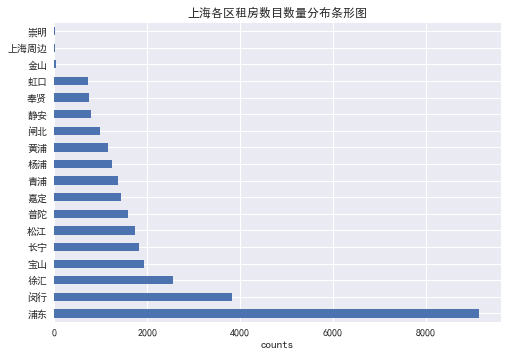

In [45]:
data['region'].value_counts().plot(kind='barh')
plt.xlabel("counts")
plt.title("上海各区租房数目数量分布条形图")
plt.show()

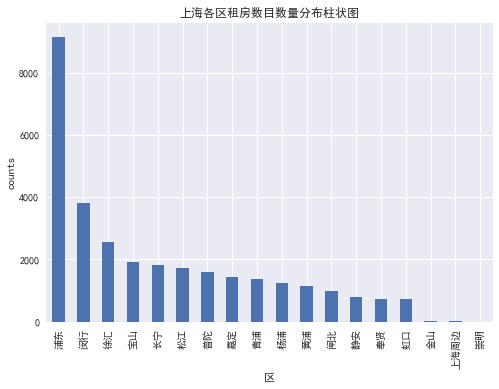

In [46]:
data['region'].value_counts().plot(kind='bar')
plt.xlabel("区")
plt.ylabel('counts')
plt.title("上海各区租房数目数量分布柱状图")
plt.show()

### 8、分离X室X厅

In [47]:
data['room']=data['shiting'].apply(lambda x:re.findall(r'(.*?)室',x)[0])
data['living_rooms']=data['shiting'].apply(lambda x:re.findall(r'室(.*?)厅',x)[0])
data['room']=data['room'].astype(np.int64)
data['living_rooms']=data['living_rooms'].astype(np.int64)

In [48]:
data['shiting']=data['shiting'].apply(lambda x:x.strip())

In [49]:
aa=data['shiting'].value_counts()

In [50]:
#将计数为500以下的纳入其他
qita=aa[:10].sum()
aa=aa[:10]

In [51]:
aa

2室2厅    6673
3室2厅    6368
2室1厅    5962
1室1厅    4249
4室2厅    1776
3室1厅    1730
1室0厅    1020
1室2厅     718
2室0厅     657
4室1厅     504
Name: shiting, dtype: int64

In [52]:
aa['其他']=qita

In [53]:
aa

2室2厅     6673
3室2厅     6368
2室1厅     5962
1室1厅     4249
4室2厅     1776
3室1厅     1730
1室0厅     1020
1室2厅      718
2室0厅      657
4室1厅      504
其他      29657
Name: shiting, dtype: int64

In [54]:
cc=pd.DataFrame(aa)

In [55]:
cc['huxing']=cc.index

In [56]:
cc

,shiting,huxing
2室2厅,6673,2室2厅
3室2厅,6368,3室2厅
2室1厅,5962,2室1厅
1室1厅,4249,1室1厅
4室2厅,1776,4室2厅
3室1厅,1730,3室1厅
1室0厅,1020,1室0厅
1室2厅,718,1室2厅
2室0厅,657,2室0厅
4室1厅,504,4室1厅


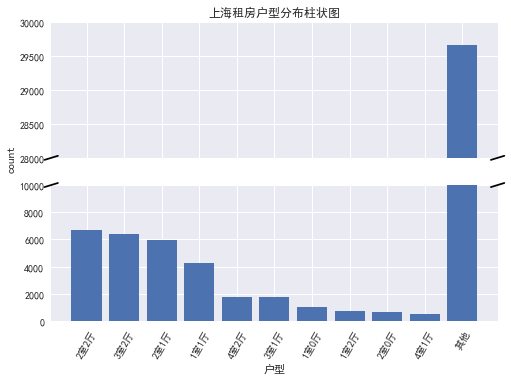

In [57]:
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True)
ax.bar(range(1, 12), cc["shiting"])
ax2.bar(range(1, 12), cc["shiting"])
ax.set_ylim(28000, 30000)
ax2.set_ylim(0, 10000)
ax.spines["bottom"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop = "off")
ax2.xaxis.tick_bottom()
plt.xticks(range(1, 12), list(cc["huxing"]), rotation = 60)

#绘制坐标轴截断线
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

plt.xlabel("户型")
ax.set_title("上海租房户型分布柱状图")
ax.set_ylabel("count", position = (0, 0))
plt.show()

### 画完图把shiting一列丢掉

In [58]:
data.drop("shiting",axis=1,inplace=True)
data.drop("date",axis=1,inplace=True)
data.head()

,chaoxiang,kanguo,mianji,price,region,street,xiaoqu,water_supply_region,floor,room,living_rooms
0,朝南,4,66,4600,浦东,唐镇,毕加索小镇（一期）（公寓）,中,1,2,1
1,朝南北,4,50,3700,闵行,静安新城,静安新城（三区）,高,1,1,1
2,朝南北,4,89,7500,浦东,三林,万科金色雅筑,中,2,3,2
3,朝南,4,32,7000,静安,南京西路,升平小区,中,0,1,0
4,无朝向数据,4,57,3800,杨浦,中原,市光三村,中,1,2,1


### 9、处理街道、小区

### 比较杂乱，直接去掉就好

In [59]:
data.drop(['street','xiaoqu'],axis=1,inplace=True)

In [60]:
data.head()

,chaoxiang,kanguo,mianji,price,region,water_supply_region,floor,room,living_rooms
0,朝南,4,66,4600,浦东,中,1,2,1
1,朝南北,4,50,3700,闵行,高,1,1,1
2,朝南北,4,89,7500,浦东,中,2,3,2
3,朝南,4,32,7000,静安,中,0,1,0
4,无朝向数据,4,57,3800,杨浦,中,1,2,1


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31129 entries, 0 to 31128
Data columns (total 9 columns):
chaoxiang              31129 non-null object
kanguo                 31129 non-null int64
mianji                 31129 non-null int64
price                  31129 non-null int64
region                 31129 non-null object
water_supply_region    31129 non-null object
floor                  31129 non-null int64
room                   31129 non-null int64
living_rooms           31129 non-null int64
dtypes: int64(6), object(3)
memory usage: 2.4+ MB


## 四、多变量分析

### 1、各区租房价格

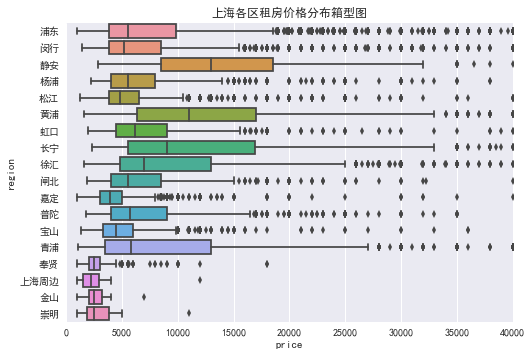

In [62]:
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']
sns.boxplot(x='price',y='region',data=data)
plt.title("上海各区租房价格分布箱型图")
plt.xlim(0,40000)
plt.show()

### 2、各区租房面积

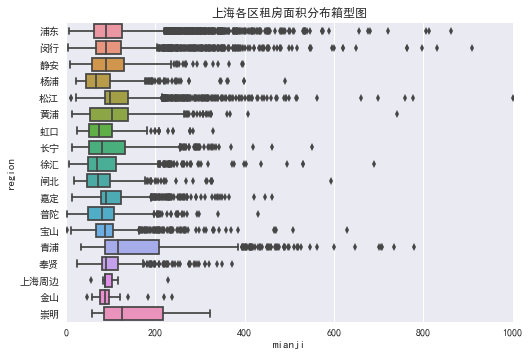

In [63]:
sns.boxplot(x='mianji',y='region',data=data)
plt.title("上海各区租房面积分布箱型图")
plt.xlim(0,1000)
plt.show()

### 3、各区租房单价

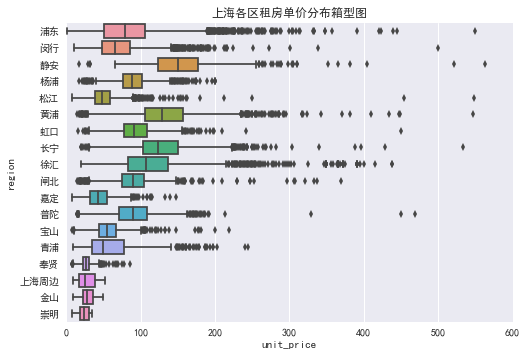

In [64]:
data['unit_price']=data['price']/data['mianji']
sns.boxplot(x='unit_price',y='region',data=data)
plt.title("上海各区租房单价分布箱型图")
plt.xlim(0,600)
plt.show()

In [65]:
aa=data['unit_price'].groupby(data['region']).median().sort_values(ascending=True)
cc=pd.DataFrame(aa)

In [66]:
cc['region']=cc.index

In [67]:
cc['place_holder']=(150-cc['unit_price'])/2

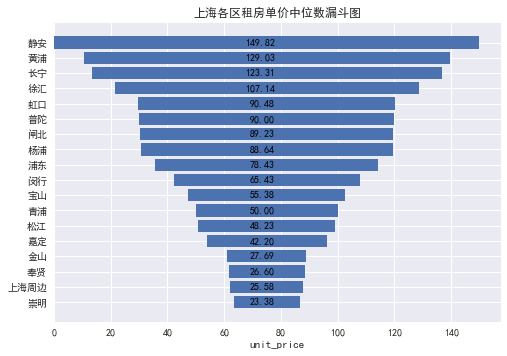

In [68]:
fig, ax = plt.subplots()
ax.barh(range(len(cc)), cc["unit_price"], align = "center", left = cc["place_holder"])
plt.yticks(range(len(cc)), cc["region"], rotation = 0)
labels = ["%.2f"%each for each in cc["unit_price"]]
for i in range(len(cc.iloc[4:, :])):
    ax.text(x = 69, y = [k for k in range(len(cc))][i] - .2, s = labels[i], color = "black", size = 10)
for i in range(len(cc.iloc[0:4, :])):
    ax.text(x = 67.3, y = [14,15,16,17][i] - .2, s = labels[i + 14], color = "black", size = 10)
plt.xlabel("unit_price")
plt.title("上海各区租房单价中位数漏斗图")
plt.show()

### 4、朝向对价格的影响

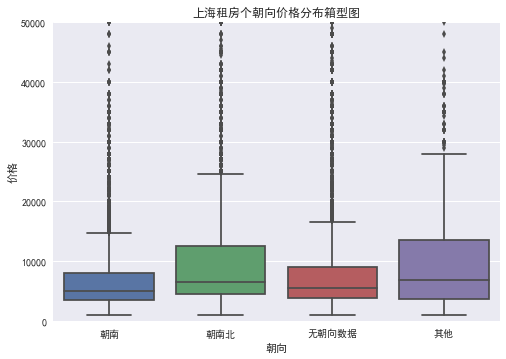

In [69]:
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']
sns.boxplot(x='chaoxiang',y='price',data=data)
plt.xlabel('朝向')
plt.ylabel('价格')
plt.title('上海租房个朝向价格分布箱型图')
plt.ylim(0,50000)
plt.show()

## 五、租房价格预测

### 1、预处理

### 变量分布one-hot encoding

In [70]:
data.head()

,chaoxiang,kanguo,mianji,price,region,water_supply_region,floor,room,living_rooms,unit_price
0,朝南,4,66,4600,浦东,中,1,2,1,69.696970
1,朝南北,4,50,3700,闵行,高,1,1,1,74.000000
2,朝南北,4,89,7500,浦东,中,2,3,2,84.269663
3,朝南,4,32,7000,静安,中,0,1,0,218.750000
4,无朝向数据,4,57,3800,杨浦,中,1,2,1,66.666667


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31129 entries, 0 to 31128
Data columns (total 10 columns):
chaoxiang              31129 non-null object
kanguo                 31129 non-null int64
mianji                 31129 non-null int64
price                  31129 non-null int64
region                 31129 non-null object
water_supply_region    31129 non-null object
floor                  31129 non-null int64
room                   31129 non-null int64
living_rooms           31129 non-null int64
unit_price             31129 non-null float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.6+ MB


In [72]:
data['kanguo']=data['kanguo'].astype(str)
data['floor']=data['floor'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31129 entries, 0 to 31128
Data columns (total 10 columns):
chaoxiang              31129 non-null object
kanguo                 31129 non-null object
mianji                 31129 non-null int64
price                  31129 non-null int64
region                 31129 non-null object
water_supply_region    31129 non-null object
floor                  31129 non-null object
room                   31129 non-null int64
living_rooms           31129 non-null int64
unit_price             31129 non-null float64
dtypes: float64(1), int64(4), object(5)
memory usage: 2.6+ MB


In [73]:
#one_hot编码http://blog.csdn.net/lujiandong1/article/details/52836051
new_data=pd.get_dummies(data)
new_data.head()

,mianji,price,room,living_rooms,unit_price,chaoxiang_其他,chaoxiang_无朝向数据,chaoxiang_朝南,chaoxiang_朝南北,kanguo_0,...,region_黄浦,water_supply_region_中,water_supply_region_低,water_supply_region_无,water_supply_region_高,floor_0,floor_1,floor_2,floor_3,floor_4
0,66,4600,2,1,69.696970,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,50,3700,1,1,74.000000,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,89,7500,3,2,84.269663,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,32,7000,1,0,218.750000,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,57,3800,2,1,66.666667,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [74]:
new_data.drop('unit_price',axis=1,inplace=True)

In [75]:
new_data.columns

Index(['mianji', 'price', 'room', 'living_rooms', 'chaoxiang_其他',
       'chaoxiang_无朝向数据', 'chaoxiang_朝南', 'chaoxiang_朝南北', 'kanguo_0',
       'kanguo_1', 'kanguo_2', 'kanguo_3', 'kanguo_4', 'region_上海周边',
       'region_嘉定', 'region_奉贤', 'region_宝山', 'region_崇明', 'region_徐汇',
       'region_普陀', 'region_杨浦', 'region_松江', 'region_浦东', 'region_虹口',
       'region_金山', 'region_长宁', 'region_闵行', 'region_闸北', 'region_青浦',
       'region_静安', 'region_黄浦', 'water_supply_region_中',
       'water_supply_region_低', 'water_supply_region_无',
       'water_supply_region_高', 'floor_0', 'floor_1', 'floor_2', 'floor_3',
       'floor_4'],
      dtype='object')

In [79]:
new_data.to_csv('new_data.csv',encoding='utf-8')

### 2、分集

In [76]:
from sklearn.model_selection import train_test_split
X=new_data.drop('price',axis=1).values
y=new_data['price'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=71)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21790, 39)
(9339, 39)
(21790,)
(9339,)


### 3、随机森林

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
rf=RandomForestClassifier(n_estimators=10,n_jobs=7,max_depth=10,random_state=71)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=7, oob_score=False, random_state=71,
            verbose=0, warm_start=False)

In [78]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print("R^2 train: %.3f, test: %.3f" % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.666, test: 0.390
